<a href="https://colab.research.google.com/github/alanmejiaa/Aprendizale-Automatico/blob/main/Articulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alan Fernando Mejia Aranda

#Aprendizaje Automico

##Articulo

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]

Lectura de datos

In [240]:
skudata = pd.read_csv("skudata.csv")
skudata.head()

,Units,Retail,Cost,Instock,Closure_Rate,Units_usa,Target
0,392437,22,3,0.9060,0.0638,475304,1
1,69410,349,123,0.9062,0.8027,138188,0
2,248107,109,48,0.9440,0.3161,313928,1
3,89189,89,33,0.9560,0.2047,1434,0
4,87539,215,96,0.8933,0.5375,185985,0


Sacamos valores unicos por variable

In [241]:
for i in skudata:
    print("The no.of unique values in",i,"are: ",skudata.loc[:,i].nunique())

The no.of unique values in Units are:  298
The no.of unique values in Retail are:  93
The no.of unique values in Cost are:  123
The no.of unique values in Instock are:  263
The no.of unique values in Closure_Rate are:  249
The no.of unique values in Units_usa are:  300
The no.of unique values in Target are:  2


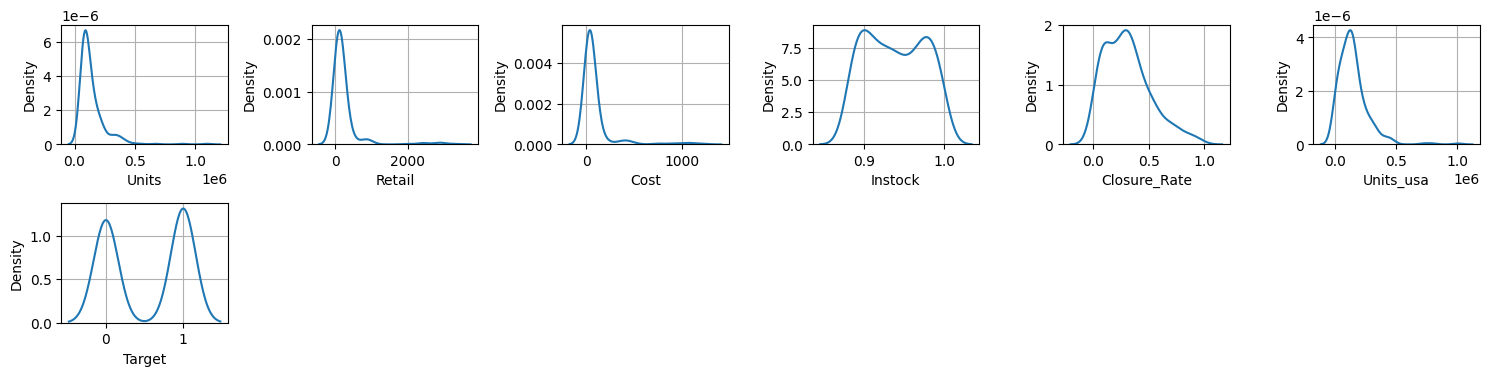

In [242]:
r=4
c=6
it=1
for i in skudata:
    plt.subplot(r,c,it)
    sns.distplot(skudata.loc[:,i],hist=False)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [243]:
y = skudata['Target']
x = skudata.drop('Target',axis=1)

Estandarizando la información

In [244]:
rs = RobustScaler()

In [245]:
x = pd.DataFrame(rs.fit_transform(x),columns=x.columns)
x.head()

,Units,Retail,Cost,Instock,Closure_Rate,Units_usa
0,3.394894,-0.851259,-0.821622,-0.466593,-0.824080,3.047843
1,-0.391691,2.141876,1.772973,-0.463640,1.888226,0.098756
2,1.703030,-0.054920,0.151351,0.094500,0.102046,1.636127
3,-0.159838,-0.237986,-0.172973,0.271687,-0.306873,-1.097566
4,-0.179180,0.915332,1.189189,-0.654116,0.914747,0.516884


In [246]:
x.isnull().sum()

Units           0
Retail          0
Cost            0
Instock         0
Closure_Rate    0
Units_usa       0
dtype: int64

In [247]:
x.shape

(300, 6)

# Modelo

In [249]:
xdata = x[0:240]
xdata

,Units,Retail,Cost,Instock,Closure_Rate,Units_usa
0,3.394894,-0.851259,-0.821622,-0.466593,-0.824080,3.047843
1,-0.391691,2.141876,1.772973,-0.463640,1.888226,0.098756
2,1.703030,-0.054920,0.151351,0.094500,0.102046,1.636127
3,-0.159838,-0.237986,-0.172973,0.271687,-0.306873,-1.097566
4,-0.179180,0.915332,1.189189,-0.654116,0.914747,0.516884
...,...,...,...,...,...,...
235,0.920257,0.366133,0.800000,0.301218,1.160686,0.809556
236,-0.348167,-0.091533,-0.021622,-0.482835,-0.056162,0.074253
237,0.001776,-0.146453,-0.454054,0.626061,-0.113426,-0.905600
238,-0.282522,0.640732,0.972973,-0.409007,0.503625,-0.449095


In [250]:
xtest = x[240:]
xtest

,Units,Retail,Cost,Instock,Closure_Rate,Units_usa
240,-0.194465,-0.054920,-0.562162,-0.630491,0.142057,-0.290696
241,-0.200807,-0.457666,-0.324324,0.286453,-0.127742,-0.737867
242,-0.365117,-0.576659,-0.259459,-0.462163,-0.581077,-0.468612
243,-0.450091,-0.723112,-0.713514,0.490218,-0.622190,-0.070395
244,1.038159,1.684211,1.816216,-0.435585,1.575847,0.673350
245,2.872084,0.768879,0.389189,0.837209,0.987061,1.660368
246,0.611822,0.311213,-0.454054,-0.191953,0.691934,1.035919
247,-0.422146,-0.695652,-0.540541,-0.307124,-0.542902,-0.075294
248,0.235434,1.867277,0.367568,-0.789959,1.986235,-0.115106
249,1.262545,0.768879,1.275676,-0.518272,1.425346,0.307947


In [251]:
ydata = y[0:240]
ydata

0      1
1      0
2      1
3      0
4      0
      ..
235    1
236    0
237    1
238    0
239    0
Name: Target, Length: 240, dtype: int64

In [252]:
ytest = y[240:]
ytest

240    0
241    0
242    0
243    0
244    1
245    1
246    1
247    0
248    1
249    1
250    0
251    0
252    1
253    1
254    0
255    1
256    1
257    1
258    0
259    0
260    0
261    1
262    1
263    0
264    1
265    0
266    1
267    0
268    1
269    1
270    1
271    1
272    0
273    1
274    1
275    1
276    1
277    1
278    0
279    1
280    0
281    1
282    1
283    1
284    1
285    0
286    1
287    0
288    1
289    1
290    0
291    1
292    1
293    1
294    0
295    1
296    0
297    1
298    0
299    0
Name: Target, dtype: int64

In [253]:
xc = sm.add_constant(xdata)
xc.head()

,const,Units,Retail,Cost,Instock,Closure_Rate,Units_usa
0,1.0,3.394894,-0.851259,-0.821622,-0.466593,-0.824080,3.047843
1,1.0,-0.391691,2.141876,1.772973,-0.463640,1.888226,0.098756
2,1.0,1.703030,-0.054920,0.151351,0.094500,0.102046,1.636127
3,1.0,-0.159838,-0.237986,-0.172973,0.271687,-0.306873,-1.097566
4,1.0,-0.179180,0.915332,1.189189,-0.654116,0.914747,0.516884


In [254]:
ydata = ydata.astype('int')

In [255]:
ydata.value_counts()

1    122
0    118
Name: Target, dtype: int64

In [288]:
knn = KNeighborsClassifier()
gausnb = GaussianNB()
logreg = LogisticRegression()
dectreeclas = DecisionTreeClassifier()
randforclas = RandomForestClassifier()
model_list = [knn,gausnb,logreg,dectreeclas,randforclas]
cm = []
data_acc = []
for i in model_list:
    i_model = i.fit(xdata,ydata)
    ypred_data = i_model.predict(xdata)
    ypred_test = i_model.predict(xtest)
    data_acc.append(accuracy_score(ydata,ypred_data))

In [257]:
data_acc

[0.95, 1.0, 1.0, 0.925, 0.9583333333333334]

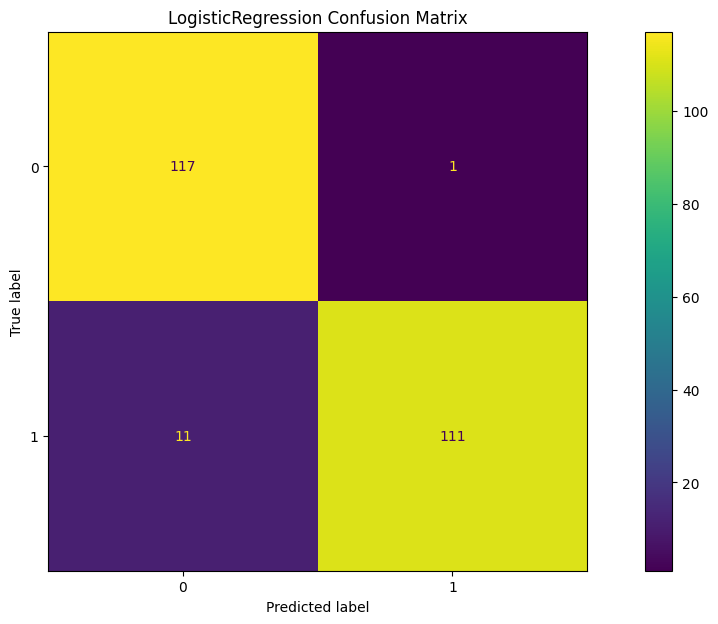

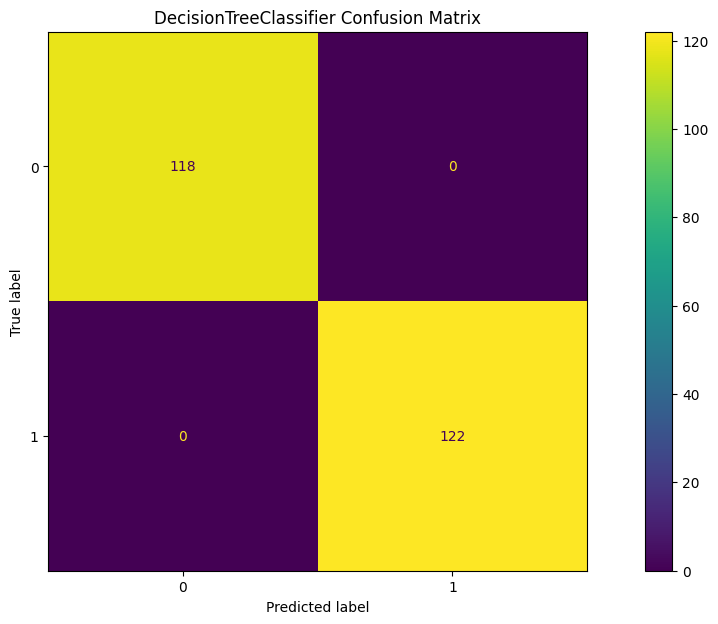

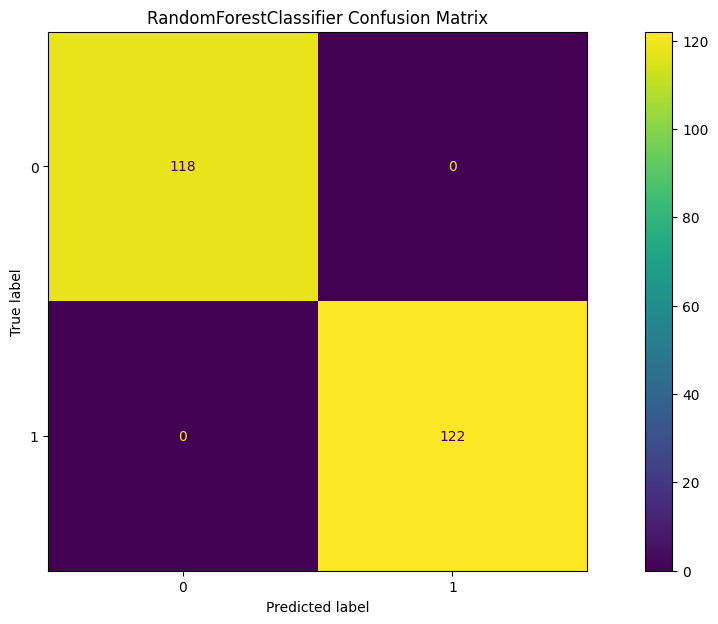

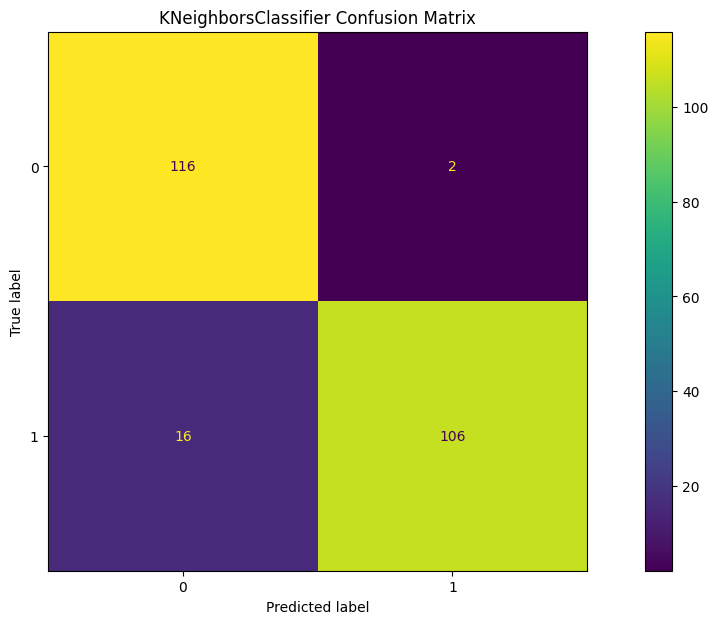

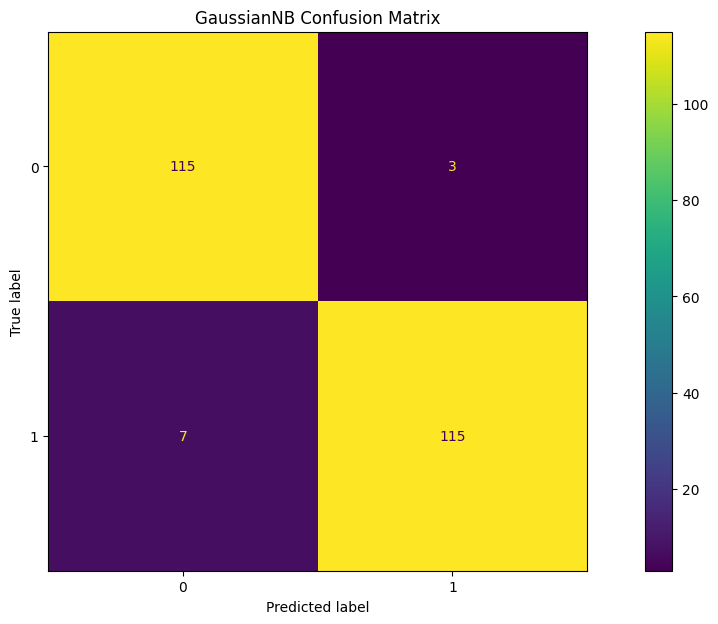

In [258]:
for i in model_list:
    i_model = i.fit(xdata,ydata)
    ypred_data = i_model.predict(xdata)
    ypred_test = i_model.predict(xtest)
    cm = confusion_matrix(ydata, ypred_data)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(str(i.__class__.__name__) + " Confusion Matrix")
    plt.show()

Al parecer nuestro modelo Decision Tree Classifier y Random Forest son los mas acertados. 

Pondremos a prueba de nuevo al modelo para ver su acertación, ahora con el 80% de la base de train y el otro 20% para comparar

In [259]:
data2 = pd.read_csv("skudata.csv")
data2 = data2[0:240]
data2.head()

,Units,Retail,Cost,Instock,Closure_Rate,Units_usa,Target
0,392437,22,3,0.9060,0.0638,475304,1
1,69410,349,123,0.9062,0.8027,138188,0
2,248107,109,48,0.9440,0.3161,313928,1
3,89189,89,33,0.9560,0.2047,1434,0
4,87539,215,96,0.8933,0.5375,185985,0


In [260]:
data2.shape

(240, 7)

In [261]:
y2 = data2['Target']
x2 = data2.drop('Target',axis=1)

In [262]:
rs2 = RobustScaler()

In [263]:
data2.head()

,Units,Retail,Cost,Instock,Closure_Rate,Units_usa,Target
0,392437,22,3,0.9060,0.0638,475304,1
1,69410,349,123,0.9062,0.8027,138188,0
2,248107,109,48,0.9440,0.3161,313928,1
3,89189,89,33,0.9560,0.2047,1434,0
4,87539,215,96,0.8933,0.5375,185985,0


In [264]:
data2.isnull().sum()

Units           0
Retail          0
Cost            0
Instock         0
Closure_Rate    0
Units_usa       0
Target          0
dtype: int64

In [265]:
data2.shape

(240, 7)

# Modelo 2

In [266]:
x2data = xdata[0:200]
x2data

,Units,Retail,Cost,Instock,Closure_Rate,Units_usa
0,3.394894,-0.851259,-0.821622,-0.466593,-0.824080,3.047843
1,-0.391691,2.141876,1.772973,-0.463640,1.888226,0.098756
2,1.703030,-0.054920,0.151351,0.094500,0.102046,1.636127
3,-0.159838,-0.237986,-0.172973,0.271687,-0.306873,-1.097566
4,-0.179180,0.915332,1.189189,-0.654116,0.914747,0.516884
...,...,...,...,...,...,...
195,2.427544,0.768879,1.102703,0.035437,1.060108,2.376268
196,0.130111,1.189931,1.189189,0.578811,1.909516,-0.578155
197,0.369009,-0.146453,-0.562162,0.516796,-0.040745,0.034047
198,-0.335519,0.311213,0.518919,0.541897,0.309076,-0.087690


In [267]:
x2test = xdata[200:]
x2test

,Units,Retail,Cost,Instock,Closure_Rate,Units_usa
200,0.915627,-0.549199,-0.389189,0.382429,-0.593925,0.872078
201,-0.034129,21.821510,19.070270,0.620155,-0.557218,-1.079685
202,-0.384494,2.416476,2.637838,-0.531561,-0.965770,0.227763
203,-0.344685,0.457666,0.324324,-0.769288,1.182711,-0.076764
204,-0.161280,6.260870,6.183784,0.159468,-0.772323,-0.937539
205,0.784713,1.684211,0.259459,-0.629014,-0.324126,0.090061
206,-0.418641,-0.823799,-0.735135,0.634921,-0.828852,-0.464571
207,-0.030671,7.542334,9.556757,-0.506460,-0.508397,-0.961360
208,0.239783,-0.906178,-0.735135,-0.772241,-0.846839,0.009282
209,-0.128364,-0.421053,-0.172973,-0.106312,-0.450399,-0.750455


In [268]:
y2data = ydata[0:200]
y2data

0      1
1      0
2      1
3      0
4      0
      ..
195    1
196    1
197    1
198    0
199    1
Name: Target, Length: 200, dtype: int64

In [269]:
y2test = ydata[200:]
y2test

200    1
201    0
202    0
203    0
204    0
205    1
206    0
207    1
208    1
209    0
210    1
211    0
212    0
213    1
214    1
215    0
216    1
217    1
218    0
219    0
220    0
221    0
222    1
223    0
224    1
225    0
226    1
227    0
228    0
229    1
230    0
231    0
232    0
233    1
234    0
235    1
236    0
237    1
238    0
239    0
Name: Target, dtype: int64

In [270]:
y2data = y2data.astype('int')

In [271]:
y2data.value_counts()

1    106
0     94
Name: Target, dtype: int64

In [289]:
knn = KNeighborsClassifier()
gausnb = GaussianNB()
logreg = LogisticRegression()
dectreeclas = DecisionTreeClassifier()
randforclas = RandomForestClassifier()
model_list = [knn,gausnb,logreg,dectreeclas,randforclas]

In [290]:

data_acc2 = []
for i in model_list:
    i_model = i.fit(x2data,y2data)
    y2pred_data = i_model.predict(x2data)
    y2pred_test = i_model.predict(x2test)
    data_acc2.append(accuracy_score(y2data,y2pred_data))

In [274]:
data_acc2

[0.945, 1.0, 1.0, 0.91, 0.955]

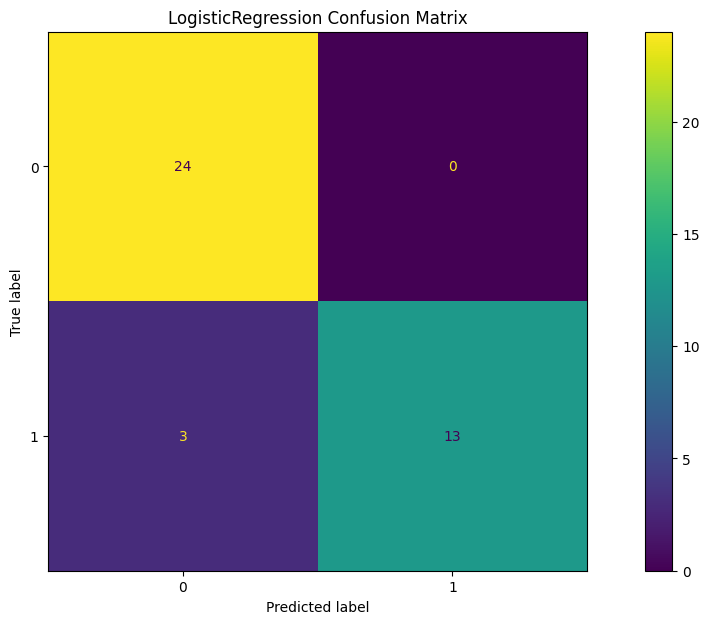

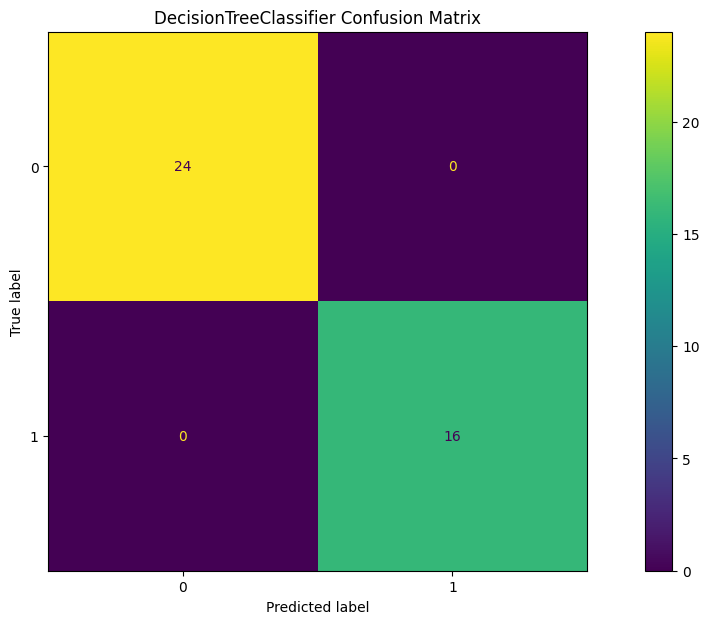

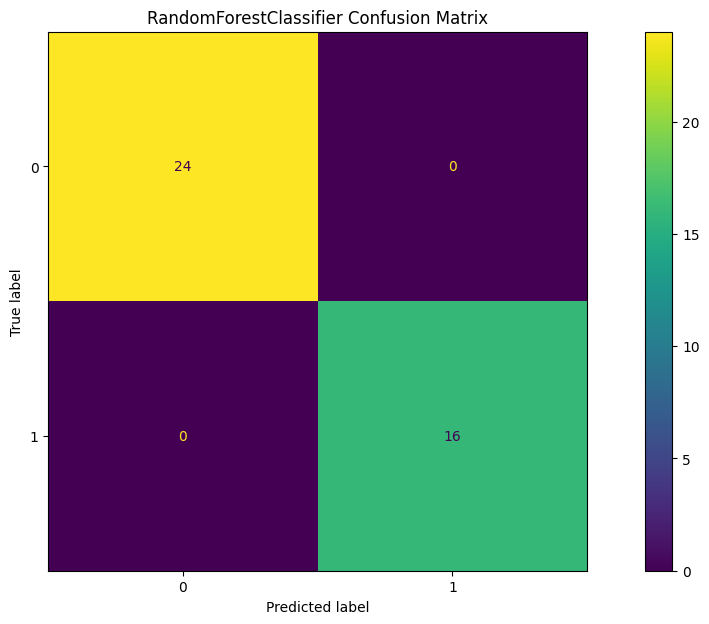

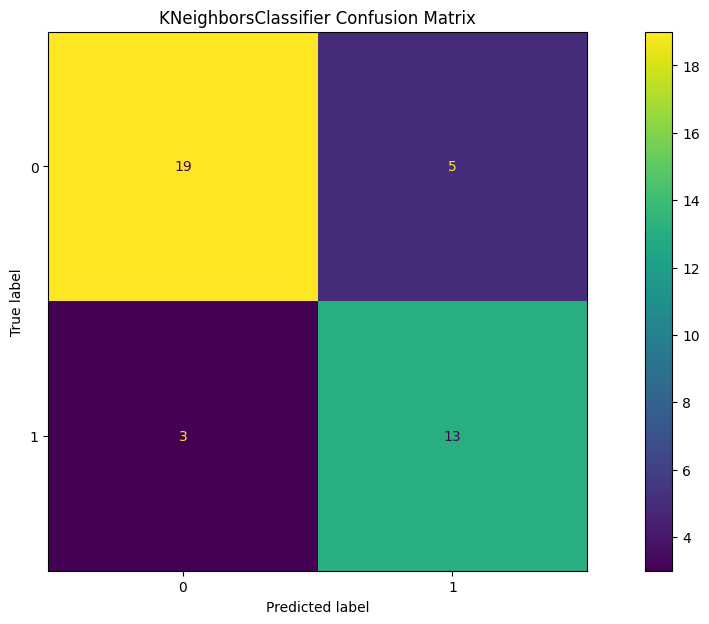

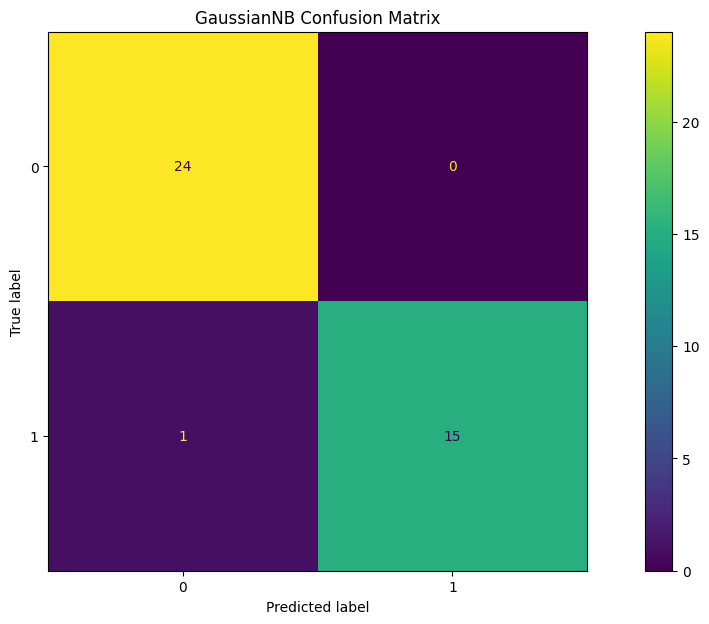

In [275]:
for i in model_list:
    i_model = i.fit(x2data,y2data)
    y2pred_data = i_model.predict(x2data)
    y2pred_test = i_model.predict(x2test)
    cm = confusion_matrix(y2test, y2pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(str(i.__class__.__name__) + " Confusion Matrix")
    plt.show()

Obtuvimos los mismos mejores modelos que en la prueba anterior

Dado que estamos tratando con un desequilibrio de clases, debemos utilizar SMOTE, que es una técnica de sobremuestreo que generará muestras sintéticas de la clase minoritaria para equilibrar la distribución de clases.


# Modelo 3

SMOTE funciona seleccionando una muestra de la clase minoritaria y encontrando sus k-vecinos más cercanos para seleccionar uno de ellos al azar e interpolar una nueva muestra entre la muestra original y el vecino elegido, creando sintéticamente una nueva muestra de la clase minoritaria y repitiendo este proceso hasta que tengamos equilibrio entre ambas clases.

Este proceso se realiza porque el desequilibrio de clases puede hacer que los clasificadores se sesguen hacia la clase mayoritaria y les resulte difícil identificar correctamente los ejemplos de la clase minoritaria, lo que conduce a un rendimiento deficiente y puntuaciones de recuperación bajas.

In [276]:
y2data.value_counts()

1    106
0     94
Name: Target, dtype: int64

In [277]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,recall_score, f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression,RidgeClassifier
import xgboost as xgb

In [278]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x2data, y2data)

In [279]:
y_resampled.value_counts()

1    106
0    106
Name: Target, dtype: int64

In [280]:
# Getting the value counts of y_test
value_counts = y2test.value_counts()

# Creating a dataframe from the value counts
test_values = pd.DataFrame({'Did not default': value_counts[0], 'Defaulted': value_counts[1]}, index=['Count'])
test_values

,Did not default,Defaulted
Count,24,16


In [282]:
def evaluate_classifier(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    recall = recall_score(y_test,y_pred)
    print(f'Recall: {recall*100:.2f}%')
    precision = precision_score(y_test,y_pred)
    print(f'Precision: {precision*100:.2f}%')
    f1 = f1_score(y_test,y_pred)
    print(f'F1 Score: {f1*100:.2f}%')
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index=['Verdadero (Llega a la meta)', 'Verdadero (No llega a la meta)'], 
                         columns=['Predecido (Llega a la meta)', 'Predecido (No llega a la meta)'])
    fig, ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(df_cm, annot=True,fmt='d', annot_kws={"size": 15})

Obtendremos los datos de cada metodo

Accuracy: 92.50%
Recall: 81.25%
Precision: 100.00%
F1 Score: 89.66%


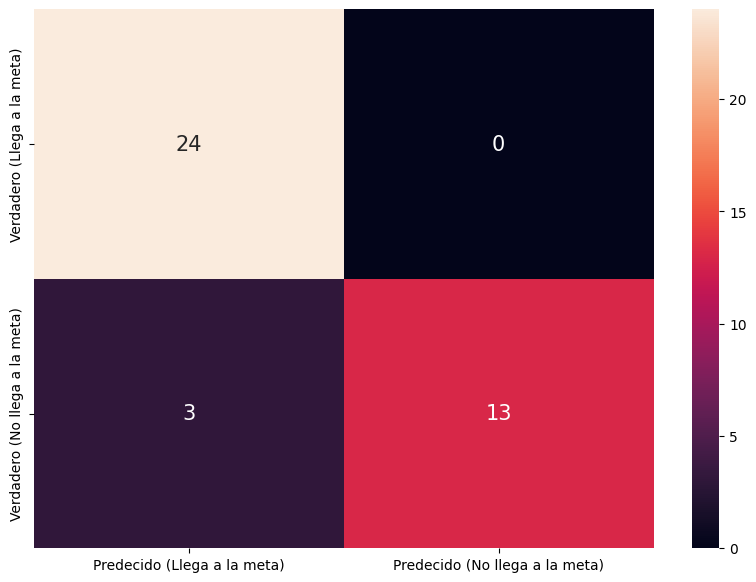

In [283]:
logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(x2test)
evaluate_classifier(y2test, y_pred)

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1 Score: 100.00%


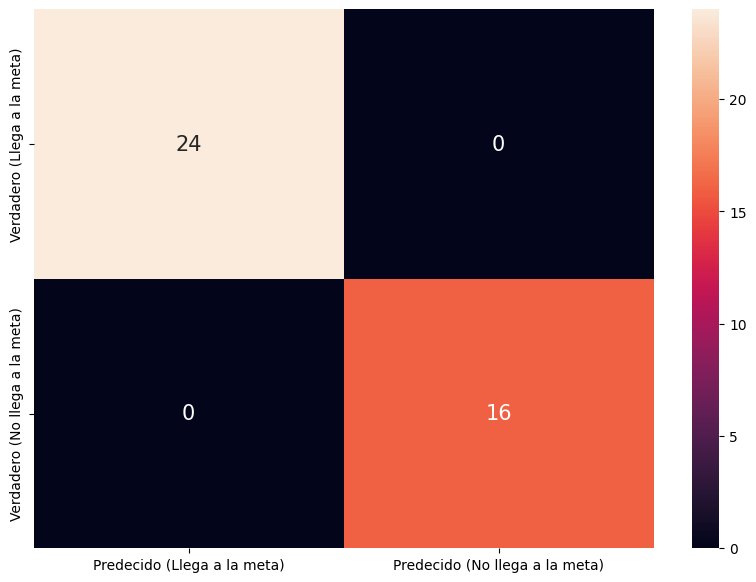

In [284]:
dt = DecisionTreeClassifier()
dt.fit(X_resampled, y_resampled)
y_pred = dt.predict(x2test)
evaluate_classifier(y2test, y_pred)

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1 Score: 100.00%


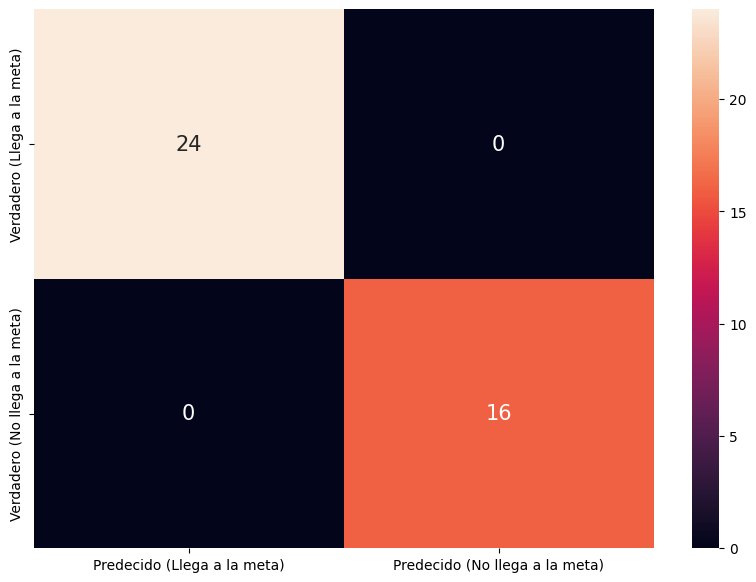

In [285]:
randomforest = RandomForestClassifier(n_estimators=500)
randomforest.fit(X_resampled, y_resampled)
y_pred = randomforest.predict(x2test)
evaluate_classifier(y2test, y_pred)

Accuracy: 80.00%
Recall: 81.25%
Precision: 72.22%
F1 Score: 76.47%


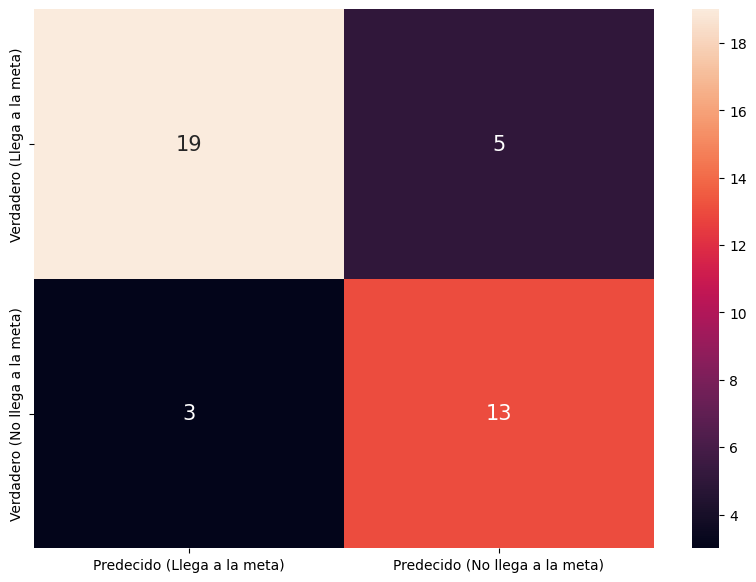

In [287]:
knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)
y_pred = knn.predict(x2test)
evaluate_classifier(y2test, y_pred)